In [1]:
var openDigger = require('../src/open_digger');

In [2]:
var query = openDigger.driver.clickhouse.query;
query(
    `show databases`
    )

[
  { name: '_temporary_and_external_tables' },
  { name: 'default' },
  { name: 'github_log' },
  { name: 'system' }
]

In [3]:
var year = 2022;
var limit = 15;
query(
    `SELECT anyHeavy(repo_name) as repo_name, COUNT(*) as cnt
    FROM github_log.year${year}
    GROUP BY repo_id
    ORDER BY cnt DESC     
    LIMIT ${limit}`)
    .then(res=>{    
        console.log(res);
});

[
  { repo_name: 'YTVanced/VancedManager', cnt: '2884' },
  { repo_name: 'dnSpy/dnSpy', cnt: '1379' },
  { repo_name: 'netchx/netch', cnt: '1308' },
  { repo_name: 'vmware/clarity', cnt: '1098' },
  { repo_name: 'h2y/Shadowrocket-ADBlock-Rules', cnt: '995' },
  { repo_name: 'GitSquared/edex-ui', cnt: '990' },
  { repo_name: 'helm/charts', cnt: '796' },
  { repo_name: 'PowerShellMafia/PowerSploit', cnt: '746' },
  { repo_name: 'DeviaVir/zenbot', cnt: '645' },
  { repo_name: 'CoatiSoftware/Sourcetrail', cnt: '586' },
  { repo_name: 'MathewSachin/Captura', cnt: '577' },
  { repo_name: 'angular/angular.js', cnt: '487' },
  { repo_name: 'surmon-china/vue-awesome-swiper', cnt: '481' },
  { repo_name: 'boltdb/bolt', cnt: '471' },
  { repo_name: 'getlantern/download', cnt: '444' }
]


# 全局变量

In [4]:
//var year = 2016;
//var limit = 1;
//var type = 'WatchEvent' //'WatchEvent' 'ForkEvent'
//var filed = ['repo_forks_count', 'repo_stargazers_count', 
//             'issue_created_at', 'issue_closed_at',
//            ]
const year_ls = [2016,2017,2018,2019,2020,2021]
var repo_id = 50807547;


# 一些help function

In [46]:
function count_type_each_month(year_ls, type, ls) {
    year_ls.forEach(each=>{
        query(
            `
            SELECT count(*) record_count, month,year_t from (
                SELECT created_at, toMonth(created_at) month,toYear(created_at) year_t
                FROM github_log.year${each}    
                where repo_id = ${repo_id}
                and type = '${type}'
            ) t
            group by t.month,t.year_t order by t.month,t.year_t 
            `).then(
            res=>{
                ls.push(res)
            }

        )
    })
}

function count_type_action_each_month(year_ls, type, action, ls) {
    year_ls.forEach(each=>{
        query(
            `
            SELECT count(*) record_count, month,year_t from (
                SELECT created_at, toMonth(created_at) month,toYear(created_at) year_t
                FROM github_log.year${each}    
                where repo_id = ${repo_id}
                and type = '${type}'
                and action = '${action}'
            ) t
            group by t.month,t.year_t order by t.month,t.year_t
            `).then(
            res=>{
                ls.push(res)
            }
        )
    })
}
function plotxy(count_ls,y_,x_,year_){
    for(var i = 0;i< count_ls.length;i++)
    {

        count_ls[i].forEach(function(v){
        y_.push(parseInt(v.record_count))
        x_.push(count_ls[i][0].year_t.toString() + '-' + v.month.toString())
        })
    }
}

function plot(y_,x_,year_,t){
openDigger.render.plotly([{y:y_,x:x_,}
                         ],  {title: t});
}

function table_(count_ls){
    var all_ls=[]
    for(var i = 0;i< count_ls.length;i++)
    {
        
        count_ls[i].forEach(function(v){
        all_ls.push(v)})
    }
    console.table(
        all_ls.map((d, i) => {
            return {
                '年份': d.year_t,
                '月份': d.month,
                '个数': d.record_count,

                };
            }
        )
    );
}


# 1

In [47]:
// 1.每月新增star
var star_count_ls = []
count_type_each_month(year_ls, 'WatchEvent', star_count_ls)

In [48]:
star_count_ls.sort(function(a,b){
            return a[0].year_t-b[0].year_t});

[
  [
    { record_count: '375', month: 2, year_t: 2016 },
    { record_count: '157', month: 3, year_t: 2016 },
    { record_count: '115', month: 4, year_t: 2016 },
    { record_count: '160', month: 5, year_t: 2016 },
    { record_count: '279', month: 6, year_t: 2016 },
    { record_count: '442', month: 7, year_t: 2016 },
    { record_count: '332', month: 8, year_t: 2016 },
    { record_count: '245', month: 9, year_t: 2016 },
    { record_count: '201', month: 10, year_t: 2016 },
    { record_count: '324', month: 11, year_t: 2016 },
    { record_count: '150', month: 12, year_t: 2016 }
  ],
  [
    { record_count: '201', month: 1, year_t: 2017 },
    { record_count: '226', month: 2, year_t: 2017 },
    { record_count: '189', month: 3, year_t: 2017 },
    { record_count: '216', month: 4, year_t: 2017 },
    { record_count: '169', month: 5, year_t: 2017 },
    { record_count: '118', month: 6, year_t: 2017 },
    { record_count: '124', month: 7, year_t: 2017 },
    { record_count: '245', mo

In [49]:
var star_y=[]
var star_x=[]
var star_year=[]
plotxy(star_count_ls,star_y,star_x,star_year)

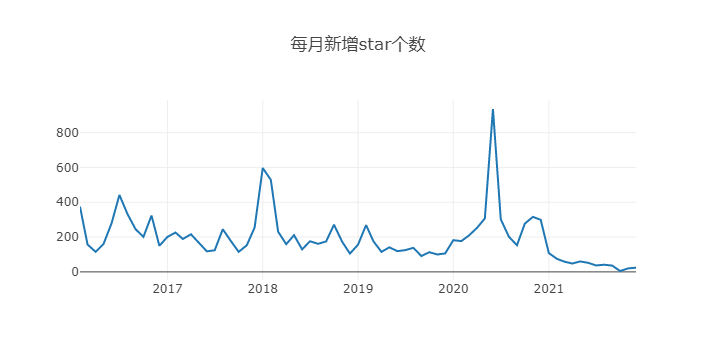

┌─────────┬──────┬──────┬───────┐
│ (index) │ 年份 │ 月份 │ 个数  │
├─────────┼──────┼──────┼───────┤
│    0    │ 2016 │  2   │ '375' │
│    1    │ 2016 │  3   │ '157' │
│    2    │ 2016 │  4   │ '115' │
│    3    │ 2016 │  5   │ '160' │
│    4    │ 2016 │  6   │ '279' │
│    5    │ 2016 │  7   │ '442' │
│    6    │ 2016 │  8   │ '332' │
│    7    │ 2016 │  9   │ '245' │
│    8    │ 2016 │  10  │ '201' │
│    9    │ 2016 │  11  │ '324' │
│   10    │ 2016 │  12  │ '150' │
│   11    │ 2017 │  1   │ '201' │
│   12    │ 2017 │  2   │ '226' │
│   13    │ 2017 │  3   │ '189' │
│   14    │ 2017 │  4   │ '216' │
│   15    │ 2017 │  5   │ '169' │
│   16    │ 2017 │  6   │ '118' │
│   17    │ 2017 │  7   │ '124' │
│   18    │ 2017 │  8   │ '245' │
│   19    │ 2017 │  9   │ '177' │
│   20    │ 2017 │  10  │ '115' │
│   21    │ 2017 │  11  │ '153' │
│   22    │ 2017 │  12  │ '255' │
│   23    │ 2018 │  1   │ '597' │
│   24    │ 2018 │  2   │ '529' │
│   25    │ 2018 │  3   │ '231' │
│   26    │ 2018 │  

In [50]:
plot(star_y,star_x,star_year,'每月新增star个数')
table_(star_count_ls)

In [27]:
// 1.每月新增Fork_ls
var Fork_count_ls = []
count_type_each_month(year_ls, 'ForkEvent', Fork_count_ls)

In [28]:
Fork_count_ls.sort(function(a,b){
            return a[0].year_t-b[0].year_t});

[
  [
    { record_count: '22', month: 2, year_t: 2016 },
    { record_count: '15', month: 3, year_t: 2016 },
    { record_count: '16', month: 4, year_t: 2016 },
    { record_count: '11', month: 5, year_t: 2016 },
    { record_count: '13', month: 6, year_t: 2016 },
    { record_count: '22', month: 7, year_t: 2016 },
    { record_count: '21', month: 8, year_t: 2016 },
    { record_count: '17', month: 9, year_t: 2016 },
    { record_count: '21', month: 10, year_t: 2016 },
    { record_count: '17', month: 11, year_t: 2016 },
    { record_count: '14', month: 12, year_t: 2016 }
  ],
  [
    { record_count: '16', month: 1, year_t: 2017 },
    { record_count: '22', month: 2, year_t: 2017 },
    { record_count: '17', month: 3, year_t: 2017 },
    { record_count: '26', month: 4, year_t: 2017 },
    { record_count: '26', month: 5, year_t: 2017 },
    { record_count: '9', month: 6, year_t: 2017 },
    { record_count: '12', month: 7, year_t: 2017 },
    { record_count: '14', month: 8, year_t: 2017

In [30]:
var fork_y=[]
var fork_x=[]
var fork_year=[]
plotxy(Fork_count_ls,fork_y,fork_x,fork_year)



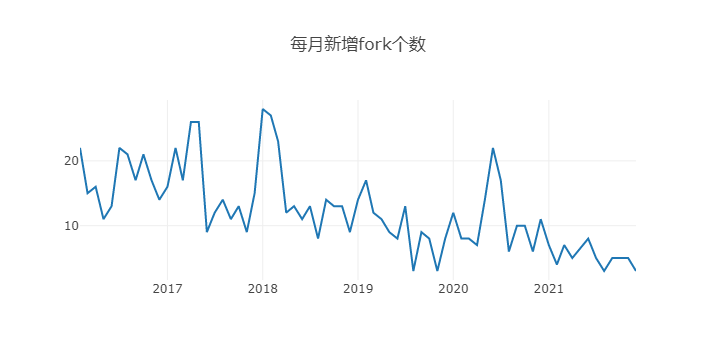

┌─────────┬──────┬──────┬──────┐
│ (index) │ 年份 │ 月份 │ 个数 │
├─────────┼──────┼──────┼──────┤
│    0    │ 2016 │  2   │ '22' │
│    1    │ 2016 │  3   │ '15' │
│    2    │ 2016 │  4   │ '16' │
│    3    │ 2016 │  5   │ '11' │
│    4    │ 2016 │  6   │ '13' │
│    5    │ 2016 │  7   │ '22' │
│    6    │ 2016 │  8   │ '21' │
│    7    │ 2016 │  9   │ '17' │
│    8    │ 2016 │  10  │ '21' │
│    9    │ 2016 │  11  │ '17' │
│   10    │ 2016 │  12  │ '14' │
│   11    │ 2017 │  1   │ '16' │
│   12    │ 2017 │  2   │ '22' │
│   13    │ 2017 │  3   │ '17' │
│   14    │ 2017 │  4   │ '26' │
│   15    │ 2017 │  5   │ '26' │
│   16    │ 2017 │  6   │ '9'  │
│   17    │ 2017 │  7   │ '12' │
│   18    │ 2017 │  8   │ '14' │
│   19    │ 2017 │  9   │ '11' │
│   20    │ 2017 │  10  │ '13' │
│   21    │ 2017 │  11  │ '9'  │
│   22    │ 2017 │  12  │ '15' │
│   23    │ 2018 │  1   │ '28' │
│   24    │ 2018 │  2   │ '27' │
│   25    │ 2018 │  3   │ '23' │
│   26    │ 2018 │  4   │ '12' │
│   27    │ 2018

In [31]:
plot(fork_y,fork_x,fork_year,'每月新增fork个数')
table_(Fork_count_ls)

# 2

In [32]:
// 2.每月新增issue
var issue_create_count_ls = []
count_type_action_each_month(year_ls, 'IssuesEvent', 'opened', issue_create_count_ls)

In [33]:
// 2.每月关闭issue
var issue_close_count_ls= []
count_type_action_each_month(year_ls, 'IssuesEvent', 'closed', issue_close_count_ls)

In [34]:
issue_create_count_ls.sort(function(a,b){
            return a[0].year_t-b[0].year_t});
issue_close_count_ls.sort(function(a,b){
            return a[0].year_t-b[0].year_t});

[
  [
    { record_count: '14', month: 2, year_t: 2016 },
    { record_count: '26', month: 3, year_t: 2016 },
    { record_count: '14', month: 4, year_t: 2016 },
    { record_count: '16', month: 5, year_t: 2016 },
    { record_count: '26', month: 6, year_t: 2016 },
    { record_count: '21', month: 7, year_t: 2016 },
    { record_count: '9', month: 8, year_t: 2016 },
    { record_count: '5', month: 9, year_t: 2016 },
    { record_count: '6', month: 10, year_t: 2016 },
    { record_count: '7', month: 11, year_t: 2016 },
    { record_count: '4', month: 12, year_t: 2016 }
  ],
  [
    { record_count: '3', month: 1, year_t: 2017 },
    { record_count: '1', month: 2, year_t: 2017 },
    { record_count: '4', month: 3, year_t: 2017 },
    { record_count: '6', month: 4, year_t: 2017 },
    { record_count: '5', month: 5, year_t: 2017 },
    { record_count: '1', month: 6, year_t: 2017 },
    { record_count: '3', month: 7, year_t: 2017 },
    { record_count: '2', month: 8, year_t: 2017 },
    { re

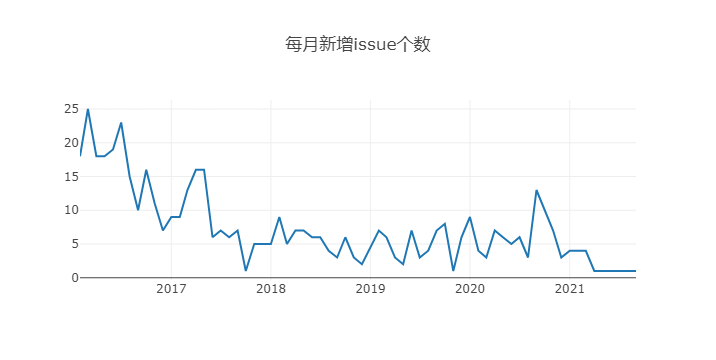

┌─────────┬──────┬──────┬──────┐
│ (index) │ 年份 │ 月份 │ 个数 │
├─────────┼──────┼──────┼──────┤
│    0    │ 2016 │  2   │ '18' │
│    1    │ 2016 │  3   │ '25' │
│    2    │ 2016 │  4   │ '18' │
│    3    │ 2016 │  5   │ '18' │
│    4    │ 2016 │  6   │ '19' │
│    5    │ 2016 │  7   │ '23' │
│    6    │ 2016 │  8   │ '15' │
│    7    │ 2016 │  9   │ '10' │
│    8    │ 2016 │  10  │ '16' │
│    9    │ 2016 │  11  │ '11' │
│   10    │ 2016 │  12  │ '7'  │
│   11    │ 2017 │  1   │ '9'  │
│   12    │ 2017 │  2   │ '9'  │
│   13    │ 2017 │  3   │ '13' │
│   14    │ 2017 │  4   │ '16' │
│   15    │ 2017 │  5   │ '16' │
│   16    │ 2017 │  6   │ '6'  │
│   17    │ 2017 │  7   │ '7'  │
│   18    │ 2017 │  8   │ '6'  │
│   19    │ 2017 │  9   │ '7'  │
│   20    │ 2017 │  10  │ '1'  │
│   21    │ 2017 │  11  │ '5'  │
│   22    │ 2017 │  12  │ '5'  │
│   23    │ 2018 │  1   │ '5'  │
│   24    │ 2018 │  2   │ '9'  │
│   25    │ 2018 │  3   │ '5'  │
│   26    │ 2018 │  4   │ '7'  │
│   27    │ 2018

In [35]:
var issue_y=[]
var issue_x=[]
var issue_year=[]
plotxy(issue_create_count_ls,issue_y,issue_x,issue_year)
plot(issue_y,issue_x,issue_year,'每月新增issue个数')
table_(issue_create_count_ls)

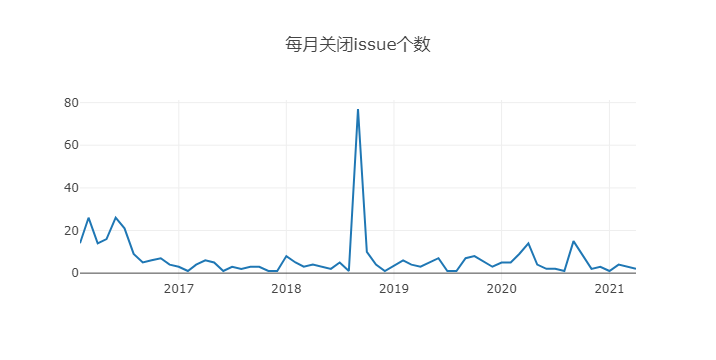

┌─────────┬──────┬──────┬──────┐
│ (index) │ 年份 │ 月份 │ 个数 │
├─────────┼──────┼──────┼──────┤
│    0    │ 2016 │  2   │ '14' │
│    1    │ 2016 │  3   │ '26' │
│    2    │ 2016 │  4   │ '14' │
│    3    │ 2016 │  5   │ '16' │
│    4    │ 2016 │  6   │ '26' │
│    5    │ 2016 │  7   │ '21' │
│    6    │ 2016 │  8   │ '9'  │
│    7    │ 2016 │  9   │ '5'  │
│    8    │ 2016 │  10  │ '6'  │
│    9    │ 2016 │  11  │ '7'  │
│   10    │ 2016 │  12  │ '4'  │
│   11    │ 2017 │  1   │ '3'  │
│   12    │ 2017 │  2   │ '1'  │
│   13    │ 2017 │  3   │ '4'  │
│   14    │ 2017 │  4   │ '6'  │
│   15    │ 2017 │  5   │ '5'  │
│   16    │ 2017 │  6   │ '1'  │
│   17    │ 2017 │  7   │ '3'  │
│   18    │ 2017 │  8   │ '2'  │
│   19    │ 2017 │  9   │ '3'  │
│   20    │ 2017 │  10  │ '3'  │
│   21    │ 2017 │  11  │ '1'  │
│   22    │ 2017 │  12  │ '1'  │
│   23    │ 2018 │  1   │ '8'  │
│   24    │ 2018 │  2   │ '5'  │
│   25    │ 2018 │  3   │ '3'  │
│   26    │ 2018 │  4   │ '4'  │
│   27    │ 2018

In [36]:
var issue_close_y=[]
var issue_close_x=[]
var issue_close_year=[]
plotxy(issue_close_count_ls,issue_close_y,issue_close_x,issue_close_year)
plot(issue_close_y,issue_close_x,issue_close_year,'每月关闭issue个数')
table_(issue_close_count_ls)

# 3

In [38]:
// 3.每月打开的pr
var open_pr_count_ls = []
count_type_action_each_month(year_ls, "PullRequestEvent", 'opened', open_pr_count_ls)

In [37]:
function count_merge_each_month(year_ls, type, action, ls) {
    year_ls.forEach(each=>{
        query(
            `
            SELECT count(*) record_count, month,year_t from (
                SELECT created_at, toMonth(created_at) month,toYear(created_at) year_t
                FROM github_log.year${each}    
                where repo_id = ${repo_id}
                and type = '${type}'
                and action = '${action}'
                and pull_merged = 1 
            ) t
            group by t.month,t.year_t order by t.month
            `).then(
            res=>{
                ls.push(res)
            }
        )
    })
}

var merge_pr_ls = []
count_merge_each_month(year_ls, "PullRequestEvent", 'closed', merge_pr_ls)

In [39]:
open_pr_count_ls.sort(function(a,b){
            return a[0].year_t-b[0].year_t});
merge_pr_ls.sort(function(a,b){
            return a[0].year_t-b[0].year_t});

[
  [
    { record_count: '6', month: 2, year_t: 2016 },
    { record_count: '6', month: 3, year_t: 2016 },
    { record_count: '3', month: 4, year_t: 2016 },
    { record_count: '3', month: 5, year_t: 2016 },
    { record_count: '1', month: 6, year_t: 2016 },
    { record_count: '1', month: 7, year_t: 2016 },
    { record_count: '1', month: 9, year_t: 2016 },
    { record_count: '1', month: 12, year_t: 2016 }
  ],
  [
    { record_count: '1', month: 2, year_t: 2017 },
    { record_count: '1', month: 4, year_t: 2017 },
    { record_count: '3', month: 5, year_t: 2017 }
  ],
  [
    { record_count: '11', month: 1, year_t: 2018 },
    { record_count: '1', month: 3, year_t: 2018 },
    { record_count: '4', month: 7, year_t: 2018 },
    { record_count: '3', month: 9, year_t: 2018 }
  ],
  [
    { record_count: '2', month: 2, year_t: 2019 },
    { record_count: '2', month: 3, year_t: 2019 },
    { record_count: '1', month: 6, year_t: 2019 },
    { record_count: '3', month: 9, year_t: 2019 }


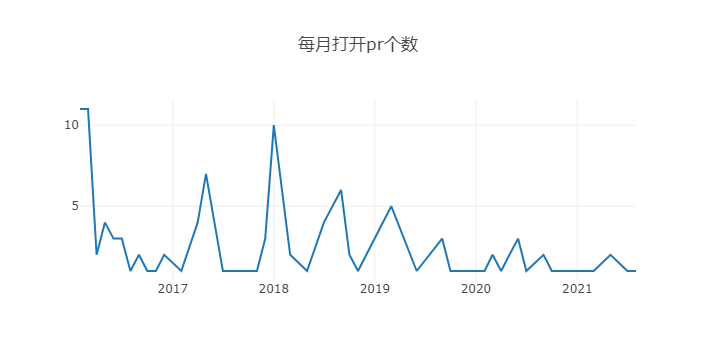

┌─────────┬──────┬──────┬──────┐
│ (index) │ 年份 │ 月份 │ 个数 │
├─────────┼──────┼──────┼──────┤
│    0    │ 2016 │  2   │ '11' │
│    1    │ 2016 │  3   │ '11' │
│    2    │ 2016 │  4   │ '2'  │
│    3    │ 2016 │  5   │ '4'  │
│    4    │ 2016 │  6   │ '3'  │
│    5    │ 2016 │  7   │ '3'  │
│    6    │ 2016 │  8   │ '1'  │
│    7    │ 2016 │  9   │ '2'  │
│    8    │ 2016 │  10  │ '1'  │
│    9    │ 2016 │  11  │ '1'  │
│   10    │ 2016 │  12  │ '2'  │
│   11    │ 2017 │  2   │ '1'  │
│   12    │ 2017 │  4   │ '4'  │
│   13    │ 2017 │  5   │ '7'  │
│   14    │ 2017 │  7   │ '1'  │
│   15    │ 2017 │  8   │ '1'  │
│   16    │ 2017 │  9   │ '1'  │
│   17    │ 2017 │  11  │ '1'  │
│   18    │ 2017 │  12  │ '3'  │
│   19    │ 2018 │  1   │ '10' │
│   20    │ 2018 │  3   │ '2'  │
│   21    │ 2018 │  5   │ '1'  │
│   22    │ 2018 │  7   │ '4'  │
│   23    │ 2018 │  9   │ '6'  │
│   24    │ 2018 │  10  │ '2'  │
│   25    │ 2018 │  11  │ '1'  │
│   26    │ 2018 │  12  │ '2'  │
│   27    │ 2019

In [40]:
var open_pr_y=[]
var open_pr_x=[]
var open_pr_year=[]
plotxy(open_pr_count_ls,open_pr_y,open_pr_x,open_pr_year)
plot(open_pr_y,open_pr_x,open_pr_year,'每月打开pr个数')
table_(open_pr_count_ls)

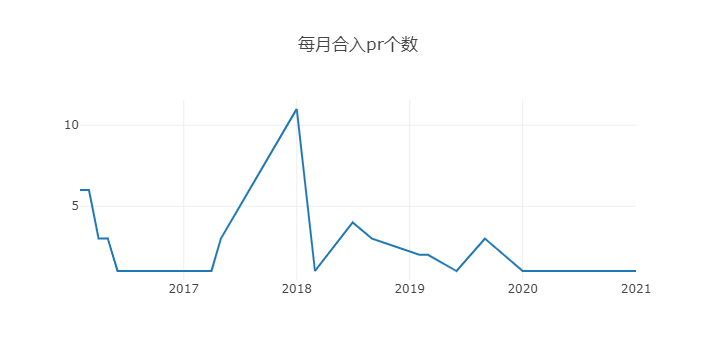

┌─────────┬──────┬──────┬──────┐
│ (index) │ 年份 │ 月份 │ 个数 │
├─────────┼──────┼──────┼──────┤
│    0    │ 2016 │  2   │ '6'  │
│    1    │ 2016 │  3   │ '6'  │
│    2    │ 2016 │  4   │ '3'  │
│    3    │ 2016 │  5   │ '3'  │
│    4    │ 2016 │  6   │ '1'  │
│    5    │ 2016 │  7   │ '1'  │
│    6    │ 2016 │  9   │ '1'  │
│    7    │ 2016 │  12  │ '1'  │
│    8    │ 2017 │  2   │ '1'  │
│    9    │ 2017 │  4   │ '1'  │
│   10    │ 2017 │  5   │ '3'  │
│   11    │ 2018 │  1   │ '11' │
│   12    │ 2018 │  3   │ '1'  │
│   13    │ 2018 │  7   │ '4'  │
│   14    │ 2018 │  9   │ '3'  │
│   15    │ 2019 │  2   │ '2'  │
│   16    │ 2019 │  3   │ '2'  │
│   17    │ 2019 │  6   │ '1'  │
│   18    │ 2019 │  9   │ '3'  │
│   19    │ 2020 │  1   │ '1'  │
│   20    │ 2020 │  3   │ '1'  │
│   21    │ 2020 │  5   │ '1'  │
│   22    │ 2021 │  1   │ '1'  │
└─────────┴──────┴──────┴──────┘


In [41]:
var merge_pr_y=[]
var merge_pr_x=[]
var merge_pr_year=[]
plotxy(merge_pr_ls,merge_pr_y,merge_pr_x,merge_pr_year)
plot(merge_pr_y,merge_pr_x,merge_pr_year,'每月合入pr个数')
table_(merge_pr_ls)

# 4

In [43]:
function active_developer_each_month(year_ls, ls){
    year_ls.forEach(each=>{
    query(
        `
        SELECT count(*) count, month,year_t from (
            SELECT distinct actor_id, toMonth(created_at) month,toYear(created_at) year_t
            FROM github_log.year${each}    
            where repo_id = ${repo_id}
        ) t
        group by t.month,t.year_t order by t.month
        `).then(
        res=>{
            ls.push(res)
        }) 
    })
}

// 4.每月活跃开发者
var active_developer = []
active_developer_each_month(year_ls, active_developer)

function plotxydev(count_ls,y_,x_,year_)
{for(var i = 0;i< count_ls.length;i++)
    {
        count_ls[i].forEach(function(v){
        y_.push(parseInt(v.count))
        x_.push(count_ls[i][0].year_t.toString() + '-' + v.month.toString())})
                            
    }
}

 
function table_count(count_ls){
    var all_ls=[]
    for(var i = 0;i< count_ls.length;i++)
    {
        
        count_ls[i].forEach(function(v){
        all_ls.push(v)})
    }
    console.table(
        all_ls.map((d, i) => {
            return {
                '年份': d.year_t,
                '月份': d.month,
                '个数': d.count,

                };
            }
        )


    );
}

In [44]:
active_developer.sort(function(a,b){
            return a[0].year_t-b[0].year_t});

[
  [
    { count: '406', month: 2, year_t: 2016 },
    { count: '209', month: 3, year_t: 2016 },
    { count: '146', month: 4, year_t: 2016 },
    { count: '199', month: 5, year_t: 2016 },
    { count: '315', month: 6, year_t: 2016 },
    { count: '491', month: 7, year_t: 2016 },
    { count: '384', month: 8, year_t: 2016 },
    { count: '285', month: 9, year_t: 2016 },
    { count: '248', month: 10, year_t: 2016 },
    { count: '372', month: 11, year_t: 2016 },
    { count: '179', month: 12, year_t: 2016 }
  ],
  [
    { count: '241', month: 1, year_t: 2017 },
    { count: '258', month: 2, year_t: 2017 },
    { count: '240', month: 3, year_t: 2017 },
    { count: '272', month: 4, year_t: 2017 },
    { count: '224', month: 5, year_t: 2017 },
    { count: '145', month: 6, year_t: 2017 },
    { count: '156', month: 7, year_t: 2017 },
    { count: '275', month: 8, year_t: 2017 },
    { count: '209', month: 9, year_t: 2017 },
    { count: '142', month: 10, year_t: 2017 },
    { count: '17

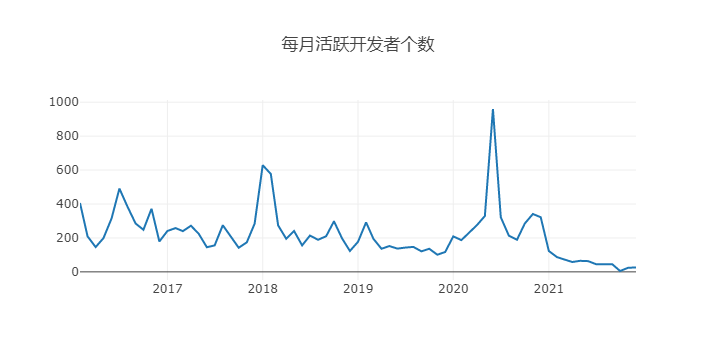

┌─────────┬──────┬──────┬───────┐
│ (index) │ 年份 │ 月份 │ 个数  │
├─────────┼──────┼──────┼───────┤
│    0    │ 2016 │  2   │ '406' │
│    1    │ 2016 │  3   │ '209' │
│    2    │ 2016 │  4   │ '146' │
│    3    │ 2016 │  5   │ '199' │
│    4    │ 2016 │  6   │ '315' │
│    5    │ 2016 │  7   │ '491' │
│    6    │ 2016 │  8   │ '384' │
│    7    │ 2016 │  9   │ '285' │
│    8    │ 2016 │  10  │ '248' │
│    9    │ 2016 │  11  │ '372' │
│   10    │ 2016 │  12  │ '179' │
│   11    │ 2017 │  1   │ '241' │
│   12    │ 2017 │  2   │ '258' │
│   13    │ 2017 │  3   │ '240' │
│   14    │ 2017 │  4   │ '272' │
│   15    │ 2017 │  5   │ '224' │
│   16    │ 2017 │  6   │ '145' │
│   17    │ 2017 │  7   │ '156' │
│   18    │ 2017 │  8   │ '275' │
│   19    │ 2017 │  9   │ '209' │
│   20    │ 2017 │  10  │ '142' │
│   21    │ 2017 │  11  │ '174' │
│   22    │ 2017 │  12  │ '284' │
│   23    │ 2018 │  1   │ '629' │
│   24    │ 2018 │  2   │ '577' │
│   25    │ 2018 │  3   │ '274' │
│   26    │ 2018 │  

In [45]:
var active_developer_y=[]
var active_developer_x=[]
var active_developer_year=[]
plotxydev(active_developer,active_developer_y,active_developer_x,active_developer_year)
plot(active_developer_y,active_developer_x,active_developer_year,'每月活跃开发者个数')
table_count(active_developer)

# 5

In [1012]:
// 按天计获取类型以及动作
function type_action_diff_by_day(year_ls, type, action_ls, diff_ls) {
    //exp. 在year_ls[0]opened，在year_ls[1:]都是关闭
    //第一年开的issue可能在后几年关闭，所以for循环的意义在于把year_ls中的每一年都看一遍，找出跨年提交的记录
    for (let i = 0; i < year_ls.length; i++) {
            query(
            `
               SELECT dateDiff('day', start, end) diff_by_day FROM 
               (
                SELECT created_at start, issue_id id
                FROM github_log.year${year_ls[0]}
                WHERE repo_id = ${repo_id}
                and type = '${type}'
                and action = '${action_ls[0]}' 
               ) AS t1 JOIN (
                SELECT created_at end, issue_id id
                FROM github_log.year${year_ls[i]}
                WHERE repo_id = ${repo_id}
                and type = '${type}'
                and action = '${action_ls[1]}' 
               )  t2 ON t1.id = t2.id 
            ` 
        ).then(
            res=>res.forEach(each => diff_ls.push(each['diff_by_day']))
        )
    }
}
Issue_diff_day_ls = []
type_action_diff_by_day(year_ls,'IssuesEvent', ['opened', 'closed'], Issue_diff_day_ls)

In [1013]:
var sum_issue_records = 0
var sum_issue_days = 0
var Issue_diff_day_ls = []
// Issue_diff_day_ls取得2016年结果
type_action_diff_by_day(year_ls, 'IssuesEvent', ['opened', 'closed'], Issue_diff_day_ls)

In [1014]:
// 2016年的结果加入计算打开关闭总天数以及计入个数
sum_issue_days += Issue_diff_day_ls.length
Issue_diff_day_ls.forEach(each => {sum_issue_records += Number(each)})
console.log(sum_issue_days, sum_issue_records, "2016年")

170 17324 2016年


In [1015]:
// Issue_diff_day_ls取得2017年结果
var Issue_diff_day_ls = []
type_action_diff_by_day(year_ls.slice(1), 'IssuesEvent', ['opened', 'closed'], Issue_diff_day_ls)

In [1016]:
// 2017年的结果加入计算打开关闭总天数以及计入个数
sum_issue_days += Issue_diff_day_ls.length
Issue_diff_day_ls.forEach(each => {sum_issue_records += Number(each)})
console.log(sum_issue_days, sum_issue_records, "2017年")

249 41405 2017年


In [1017]:
// Issue_diff_day_ls取得2018年结果
var Issue_diff_day_ls = []
type_action_diff_by_day(year_ls.slice(2), 'IssuesEvent', ['opened', 'closed'], Issue_diff_day_ls)

In [1018]:
// 2018年的结果加入计算打开关闭总天数以及计入个数
sum_issue_days += Issue_diff_day_ls.length
Issue_diff_day_ls.forEach(each => {sum_issue_records += Number(each)})
console.log(sum_issue_days, sum_issue_records, "2018年")

305 46289 2018年


In [1019]:
// Issue_diff_day_ls取得2019年结果
var Issue_diff_day_ls = []
type_action_diff_by_day(year_ls.slice(3), 'IssuesEvent', ['opened', 'closed'], Issue_diff_day_ls)

In [1020]:
// 2019年的结果加入计算打开关闭总天数以及计入个数
sum_issue_days += Issue_diff_day_ls.length
Issue_diff_day_ls.forEach(each => {sum_issue_records += Number(each)})
console.log(sum_issue_days, sum_issue_records, "2019年")

351 48829 2019年


In [1021]:
// Issue_diff_day_ls取得2020年结果
var Issue_diff_day_ls = []
type_action_diff_by_day(year_ls.slice(4), 'IssuesEvent', ['opened', 'closed'], Issue_diff_day_ls)

In [1022]:
// 2020年的结果加入计算打开关闭总天数以及计入个数
sum_issue_days += Issue_diff_day_ls.length
Issue_diff_day_ls.forEach(each => {sum_issue_records += Number(each)})
console.log(sum_issue_days, sum_issue_records, "2020年")

399 49468 2020年


In [1023]:
// Issue_diff_day_ls取得2021年结果
var Issue_diff_day_ls = []
type_action_diff_by_day(year_ls.slice(5), 'IssuesEvent', ['opened', 'closed'], Issue_diff_day_ls)

In [1024]:
// 2021年的结果加入计算打开关闭总天数以及计入个数
sum_issue_days += Issue_diff_day_ls.length
Issue_diff_day_ls.forEach(each => {sum_issue_records += Number(each)})
console.log(sum_issue_days, sum_issue_records, "2021年")

403 49474 2021年


## 5. Issue 从打开到关闭的平均时长（单位：天）

In [1025]:
avg_issue_close = sum_issue_records/sum_issue_days
console.log(avg_issue_close)

122.76426799007444


## 5. Issue 从打开到关闭的中位数（单位：天）

In [1026]:
var Issue_diff_day_ls = []
type_action_diff_by_day(year_ls, 'IssuesEvent', ['opened', 'closed'], Issue_diff_day_ls)

In [1027]:
console.log(Issue_diff_day_ls.length)
type_action_diff_by_day(year_ls.slice(1), 'IssuesEvent', ['opened', 'closed'], Issue_diff_day_ls)

170


In [1028]:
console.log(Issue_diff_day_ls.length)
type_action_diff_by_day(year_ls.slice(2), 'IssuesEvent', ['opened', 'closed'], Issue_diff_day_ls)

249


In [1029]:
console.log(Issue_diff_day_ls.length)
type_action_diff_by_day(year_ls.slice(3), 'IssuesEvent', ['opened', 'closed'], Issue_diff_day_ls)

305


In [1030]:
console.log(Issue_diff_day_ls.length)
type_action_diff_by_day(year_ls.slice(4), 'IssuesEvent', ['opened', 'closed'], Issue_diff_day_ls)

351


In [1031]:
console.log(Issue_diff_day_ls.length)
type_action_diff_by_day(year_ls.slice(5), 'IssuesEvent', ['opened', 'closed'], Issue_diff_day_ls)

399


In [1032]:
console.log(Issue_diff_day_ls.length)

403


In [1301]:
Issue_diff_day_ls.sort(function(a,b){
    return a-b;
});
console.log(Issue_diff_day_ls[201],"是Issue从打开到关闭的中位数")

5 是Issue从打开到关闭的中位数


______________________________________________________________________

# 6

In [1037]:
// PR 从打开到合入的平均时长和中位数
function open_to_merge_by_day(year_ls, type, action_ls, diff_ls) {
    for (let i = 0; i < year_ls.length; i++) {
            query(
            `
               SELECT dateDiff('day', start, end) diff_by_day FROM 
               (
                SELECT created_at start, issue_id id
                FROM github_log.year${year_ls[0]}
                WHERE repo_id = ${repo_id}
                and type = '${type}'
                and action = '${action_ls[0]}' 
               ) AS t1 JOIN (
                SELECT created_at end, issue_id id
                FROM github_log.year${year_ls[i]}
                WHERE repo_id = ${repo_id}
                and type = '${type}'
                and action = '${action_ls[1]}'
                and pull_merged = 1
               )  t2 ON t1.id = t2.id
            ` 
        ).then(
            res=>res.forEach(each => diff_ls.push(each['diff_by_day']))
        )
    }
}


In [1038]:
var sum_pr_records = 0
var count_pr_days = 0

// Issue_diff_day_ls取得2016年结果
var pr_diff_day_ls = []
open_to_merge_by_day(year_ls.slice(0), 'PullRequestEvent', ['opened', 'closed'], pr_diff_day_ls)

In [1039]:
pr_diff_day_ls.forEach(each => {sum_pr_records += Number(each)})
count_pr_days += pr_diff_day_ls.length
console.log(count_pr_days, sum_pr_records, "2016年")
// Issue_diff_day_ls取得2017年结果
var pr_diff_day_ls = []
open_to_merge_by_day(year_ls.slice(1), 'PullRequestEvent', ['opened', 'closed'], pr_diff_day_ls)

22 109 2016年


In [1040]:
pr_diff_day_ls.forEach(each => {sum_pr_records += Number(each)})
count_pr_days += pr_diff_day_ls.length
console.log(count_pr_days, sum_pr_records, "2017年")
// Issue_diff_day_ls取得2018年结果
var pr_diff_day_ls = []
open_to_merge_by_day(year_ls.slice(2), 'PullRequestEvent', ['opened', 'closed'], pr_diff_day_ls)

28 363 2017年


In [1041]:
pr_diff_day_ls.forEach(each => {sum_pr_records += Number(each)})
count_pr_days += pr_diff_day_ls.length
console.log(count_pr_days, sum_pr_records, "2018年")
// Issue_diff_day_ls取得2019年结果
var pr_diff_day_ls = []
open_to_merge_by_day(year_ls.slice(3), 'PullRequestEvent', ['opened', 'closed'], pr_diff_day_ls)

46 517 2018年


In [1042]:
pr_diff_day_ls.forEach(each => {sum_pr_records += Number(each)})
count_pr_days += pr_diff_day_ls.length
console.log(count_pr_days, sum_pr_records, "2019年")
// Issue_diff_day_ls取得2020年结果
var pr_diff_day_ls = []
open_to_merge_by_day(year_ls.slice(4), 'PullRequestEvent', ['opened', 'closed'], pr_diff_day_ls)

54 518 2019年


In [1043]:
pr_diff_day_ls.forEach(each => {sum_pr_records += Number(each)})
count_pr_days += pr_diff_day_ls.length
console.log(count_pr_days, sum_pr_records, "2020年")
// Issue_diff_day_ls取得2021年结果
var pr_diff_day_ls = []
open_to_merge_by_day(year_ls.slice(5), 'PullRequestEvent', ['opened', 'closed'], pr_diff_day_ls)

57 541 2020年


In [1044]:
pr_diff_day_ls.forEach(each => {sum_pr_records += Number(each)})
count_pr_days += pr_diff_day_ls.length
console.log(count_pr_days, sum_pr_records, "2021年")

58 542 2021年


## 6.1 PR打开到合入的平均时间

In [1045]:
console.log(sum_pr_records/count_pr_days,"是pr从打开到关闭的平均时间")

9.344827586206897 是pr从打开到关闭的平均时间


## 6.2 PR打开到合入的中位数

In [1046]:
var pr_diff_day_ls = []
type_action_diff_by_day(year_ls, 'IssuesEvent', ['opened', 'closed'], pr_diff_day_ls)

In [1047]:
console.log(pr_diff_day_ls.length)
type_action_diff_by_day(year_ls.slice(1), 'PullRequestEvent', ['opened', 'closed'], pr_diff_day_ls)

170


In [1048]:
console.log(pr_diff_day_ls.length)
type_action_diff_by_day(year_ls.slice(2), 'PullRequestEvent', ['opened', 'closed'], pr_diff_day_ls)

184


In [1049]:
console.log(pr_diff_day_ls.length)
type_action_diff_by_day(year_ls.slice(3), 'PullRequestEvent', ['opened', 'closed'], pr_diff_day_ls)

206


In [1050]:
console.log(pr_diff_day_ls.length)
type_action_diff_by_day(year_ls.slice(4), 'PullRequestEvent', ['opened', 'closed'], pr_diff_day_ls)

217


In [1051]:
console.log(pr_diff_day_ls.length)
type_action_diff_by_day(year_ls.slice(5), 'PullRequestEvent', ['opened', 'closed'], pr_diff_day_ls)

224


In [1300]:
pr_diff_day_ls.sort(function(a,b){
    return a-b;
});
var num1 = Number(pr_diff_day_ls[111])
var num2 = Number(pr_diff_day_ls[112])
console.log((num1+num2)/2,"是pr从打开到关闭的中位数")

2 是pr从打开到关闭的中位数


# 7

In [1338]:
// Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天） issue_comment_author_id
function Event_open_comment_diff_day(year_ls, type_ls, action_ls, diff_ls) {
    for (let i = 0; i < year_ls.length; i++) {
            query(
            `
               SELECT dateDiff('day', start, end) diff_by_day FROM 
                       (
                        SELECT created_at start, issue_id id, actor_id
                        FROM github_log.year${year_ls[0]}
                        WHERE repo_id = ${repo_id}
                        and type = '${type_ls[0]}'
                        and action = '${action_ls[0]}' 
                       ) t1 INNER JOIN (
                        SELECT created_at end, issue_id id, actor_id
                        FROM github_log.year${year_ls[i]}
                        WHERE repo_id = ${repo_id}
                        and type = '${type_ls[1]}'
                        and action = '${action_ls[1]}'
                        and issue_comments = 0
                       ) t2 ON (t1.id = t2.id)
                       WHERE t1.actor_id != t2.actor_id                   
              
            ` 
        ).then(    
            res=>res.forEach(each => diff_ls.push(Number(each['diff_by_day'])))

        )
    }
}

## 7.1 Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

In [1339]:
var issue_first_comment_day = []
Event_open_comment_diff_day(year_ls, ['IssuesEvent','IssueCommentEvent'], ['opened', 'created'], issue_first_comment_day)

In [1340]:
Event_open_comment_diff_day(year_ls.slice(1), ['IssuesEvent','IssueCommentEvent'],
                            ['opened', 'created'], issue_first_comment_day)

In [1341]:
Event_open_comment_diff_day(year_ls.slice(2), ['IssuesEvent','IssueCommentEvent'], 
                            ['opened', 'created'], issue_first_comment_day)

In [1342]:
Event_open_comment_diff_day(year_ls.slice(3), ['IssuesEvent','IssueCommentEvent'], 
                            ['opened', 'created'], issue_first_comment_day)

In [1343]:
Event_open_comment_diff_day(year_ls.slice(4), ['IssuesEvent','IssueCommentEvent'],
                            ['opened', 'created'], issue_first_comment_day)

In [1344]:
Event_open_comment_diff_day(year_ls.slice(5), ['IssuesEvent','IssueCommentEvent'], 
                            ['opened', 'created'], issue_first_comment_day)

In [1345]:
issue_first_comment_day.sort(function(a,b){
    return a-b;
});

[
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4,
  4, 4, 4, 4,
  ... 98 more items
]

### 7.1.1平均值

In [1346]:
var sum_issue_comment_day = 0
issue_first_comment_day.forEach(each=>{
    sum_issue_comment_day += each
})
console.log("Issue第一次回复的均值",sum_issue_comment_day/(issue_first_comment_day.length))

Issue第一次回复的均值 81.78787878787878


### 7.1.2中位数

In [1347]:
issue_first_comment_day.length

198

In [1348]:
console.log("Issue第一次回复的中位数",(issue_first_comment_day[131]+issue_first_comment_day[132])/2)

Issue第一次回复的中位数 29


## 7.2 PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

In [1330]:
// Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天） issue_comment_author_id
function pr_open_comment_diff_day(year_ls, type_ls, action_ls, diff_ls) {
    for (let i = 0; i < year_ls.length; i++) {
            query(
            `
               SELECT dateDiff('day', start, end) diff_by_day FROM 
                       (
                        SELECT created_at start, issue_id id, actor_id
                        FROM github_log.year${year_ls[0]}
                        WHERE repo_id = ${repo_id}
                        and type = '${type_ls[0]}'
                        and action = '${action_ls[0]}' 
                       ) t1 INNER JOIN (
                        SELECT created_at end, issue_id id, actor_id
                        FROM github_log.year${year_ls[i]}
                        WHERE repo_id = ${repo_id}
                        and type = '${type_ls[1]}'
                        and action = '${action_ls[1]}'
                        and pull_review_comments = 0
                       ) t2 ON (t1.id = t2.id)
                       WHERE t1.actor_id != t2.actor_id                   
              
            ` 
        ).then(    
            res=>res.forEach(each => diff_ls.push(Number(each['diff_by_day'])))

        )
    }
}

In [1331]:
var pr_first_comment_day = []
pr_open_comment_diff_day(year_ls, ['PullRequestEvent','PullRequestReviewCommentEvent'],
                            ['opened', 'created'], pr_first_comment_day)

In [1332]:
pr_open_comment_diff_day(year_ls.slice(1), ['PullRequestEvent','PullRequestReviewCommentEvent'],
                            ['opened', 'created'], pr_first_comment_day)

In [1333]:
pr_open_comment_diff_day(year_ls.slice(2), ['PullRequestEvent','PullRequestReviewCommentEvent'],
                            ['opened', 'created'], pr_first_comment_day)

In [1334]:
pr_open_comment_diff_day(year_ls.slice(3), ['PullRequestEvent','PullRequestReviewCommentEvent'],
                            ['opened', 'created'], pr_first_comment_day)

In [1335]:
pr_open_comment_diff_day(year_ls.slice(4), ['PullRequestEvent','PullRequestReviewCommentEvent'],
                            ['opened', 'created'], pr_first_comment_day)

In [1336]:
pr_open_comment_diff_day(year_ls.slice(5), ['PullRequestEvent','PullRequestReviewCommentEvent'],
                            ['opened', 'created'], pr_first_comment_day)

In [1352]:
pr_first_comment_day.sort(function(a,b){
    return a-b;
});
pr_first_comment_day.length

24

### 7.1 pr 并入均值

In [1353]:
var sum_pr_comment_day = 0
pr_first_comment_day.forEach(each=>{
    sum_pr_comment_day += each
})
console.log("pr第一次回复的均值",sum_pr_comment_day/(pr_first_comment_day.length))

pr第一次回复的均值 94.375


### 7.1 pr 并入中位数

In [1355]:
console.log("pr第一次回复的中位数",(pr_first_comment_day[11]+pr_first_comment_day[12])/2)

pr第一次回复的中位数 18
